<a href="https://colab.research.google.com/github/GURRAMSUJANKUMAR/SCT_ML_01.ipynb/blob/main/SCT_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas matplotlib scikit-learn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
data=pd.read_csv("/train.csv")

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
input =['Id','YearBuilt','YrSold','GrLivArea', 'BedroomAbvGr', 'FullBath']
output = 'SalePrice'
x = data[input]
y = data[output]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(data[input],data[output])
y_val_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_val_pred)
rmse = mse ** 0.5
print(f'Validation RMSE: {rmse}')

Validation RMSE: 46956.64176361331


In [9]:
test_data = pd.read_csv("/test.csv")


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
X_test = test_data[['Id','YearBuilt', 'YrSold', 'GrLivArea', 'BedroomAbvGr', 'FullBath']]
test_predictions = model.predict(X_test)

In [12]:
submissiondata = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})
submissiondata.to_csv('sample_submission.csv', index=False)
print('Submission file created: sample_submission.csv')

Submission file created: sample_submission.csv


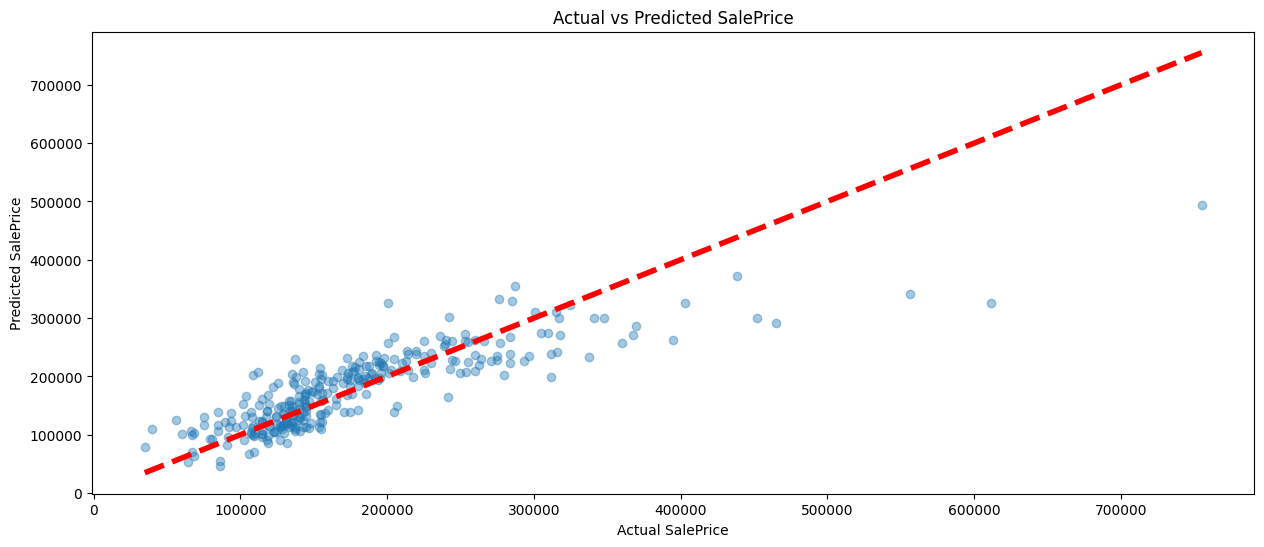

In [13]:
plt.figure(figsize=(15,6))
plt.scatter(y_test, y_val_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=4)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()